


<p style="font-family:Times New Roman;font-size:20px"><b>Dataset :</b> Participant Information of overweight breast cancer survivors</p>
<p style="font-family:Times New Roman;font-size:20px"><b>Aim :</b> To model interrelationships between health behaviors and habits concluding to a Bayesian Network</p>
<p style="font-family:Times New Roman;font-size:20px">The dataset contains following variables:</p>
<ul style="font-family:Times New Roman ; font-size:15px">
    <li><b>PraticipantNumber</b></li>
    <li><b>TumorStage</b> -  Participants’ medical records including tumor characteristics</li>
    <li><b>Neighborhood</b> - The Neighborhood Environment Index (Neighborhood) was used to measure walkability. It has a range from 0 to 6, with higher scores indicating more walkable neighborhood</li>
    <li><b>Alochol</b> - The monthly intake of alcohol</li>
    <li><b>Smoke</b> - Two level factor with Yes or No</li>
    <li><b>Insomnia</b> - Two level factor with Yes or No</li>
    <li><b>Depression</b> - Two level factor with Yes or No</li>
    <li><b>Education</b> - Place of Education(No use in analysis)</li>
    <li><b>Sleep1</b> - Refers to sleep disturbance. Normed to mean 50 with standard deviation of 10. Higher scores indicate worse sleep</li>
    <li><b>Sleep2</b> - Sleep impairment. Normed to mean 50 with standard deviation of 10.</li>
    <li><b>QOLp</b> - Quality of life (Physical). Uses SF-36 scale.Range is 0-100. Higher the score better is life style.</li>
    <li><b>QOLm</b> - Quality of life (Mental). Uses SF-36 scale.Range is 0-100. Higher the score better is life style. </li>
    <li><b>Arthritis</b> - Two level factor with Yes or No</li>
    <li><b>Insulin</b> - Ranges from 5-8 U/ml</li>
    <li><b>CRP</b> - C-reactive protein. Range 12-16</li>
    <li><b>Age</b> - Ranges from 0-120</li>
    <li><b>PA</b> - PA was the average (across days) of total counts per minute per day, thus representing a measure that captured total volume of activity</li>
    <li><b>BMI</b> - Body Mass Index (kg/m^2)</li>

</ul>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

In [ ]:
data = pd.read_csv('Downloads/dataset.csv')
data.head()

,ParticipantNumber,TumorStage,Neighborhood,Alcohol,Smoke,Insomnia,Depression,Education,Sleep1,Sleep2,QOLp,QOLm,Arthritis,Insulin,CRP,PA,BMI,Age
0,1,Stage 2,4,8.25,No,No,No,Postgraduate school or degree,44.2,38.7,86.875,93.250000,No,6.620323,14.662970,248.645687,29.387755,53
1,2,Stage 1,1,17.00,No,No,Yes,"Some college, technical school or Associate D...",51.2,43.6,76.250,81.625000,Yes,6.588302,15.086824,241.912148,28.398718,67
2,3,Stage 1,2,25.50,No,No,No,Postgraduate school or degree,35.9,38.7,58.750,79.625000,No,5.773663,16.045979,408.521245,20.077335,54
3,4,Stage 3,3,0.00,No,No,Yes,"Some college, technical school or Associate D...",56.3,52.9,26.875,37.958333,No,6.898928,16.312136,177.601267,26.838648,66
4,5,Stage 2,4,10.25,Yes,Yes,Yes,"Some college, technical school or Associate D...",62.6,56.1,76.250,82.250000,Yes,5.349781,12.376667,142.443154,37.165193,50


In [ ]:
data.replace({'Yes':1,'No':0}, inplace=True)
data.head()

,ParticipantNumber,TumorStage,Neighborhood,Alcohol,Smoke,Insomnia,Depression,Education,Sleep1,Sleep2,QOLp,QOLm,Arthritis,Insulin,CRP,PA,BMI,Age
0,1,Stage 2,4,8.25,0,0,0,Postgraduate school or degree,44.2,38.7,86.875,93.250000,0,6.620323,14.662970,248.645687,29.387755,53
1,2,Stage 1,1,17.00,0,0,1,"Some college, technical school or Associate D...",51.2,43.6,76.250,81.625000,1,6.588302,15.086824,241.912148,28.398718,67
2,3,Stage 1,2,25.50,0,0,0,Postgraduate school or degree,35.9,38.7,58.750,79.625000,0,5.773663,16.045979,408.521245,20.077335,54
3,4,Stage 3,3,0.00,0,0,1,"Some college, technical school or Associate D...",56.3,52.9,26.875,37.958333,0,6.898928,16.312136,177.601267,26.838648,66
4,5,Stage 2,4,10.25,1,1,1,"Some college, technical school or Associate D...",62.6,56.1,76.250,82.250000,1,5.349781,12.376667,142.443154,37.165193,50


## Bayesian Network

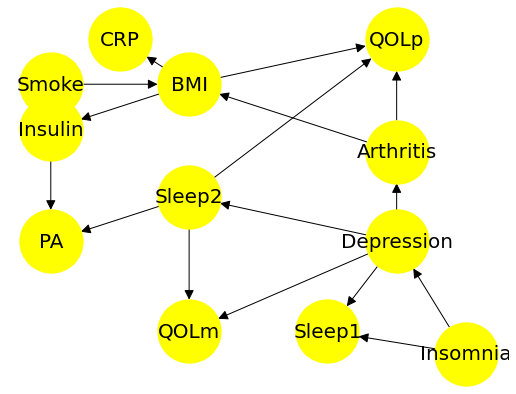

In [ ]:
model=BayesianModel([('Arthritis','QOLp'), ('Arthritis','BMI'), ('BMI','CRP'),('BMI','Insulin'),('BMI','QOLp'),('Smoke','BMI'),('Insulin','PA'),('Sleep2','PA'),('Sleep2','QOLm'),('Sleep2','QOLp'),('Depression','Arthritis'),('Depression','Sleep2'),('Depression','QOLm'),('Depression','Sleep1'),('Insomnia','Depression'),('Insomnia','Sleep1')])
model.fit(data, estimator=MaximumLikelihoodEstimator)
fig, ax=plt.subplots(figsize=(9,7))
positions={'PA':(2,1),'Sleep2':(3,2),'QOLm':(3,-1),'Sleep1':(4,-1),'Insomnia':(5,-1.5),'Depression':(4.5,1),'Arthritis':(4.5,3),'Sleep2':(3,2),'BMI':(3,4.5) ,'CRP':(2.5,5.5),'Smoke':(2,4.5),'Insulin':(2,3.5),'QOLp':(4.5,5.5)}
nx.draw(model, pos=positions, with_labels=True, node_size=4000, font_size=20, arrowsize=20, node_color='yellow', ax=ax)

<p style="font-family:Times New Roman; font-size:15px">A first notable finding is that there
were no edges from (or to) the following variables: tumor stage, years from diagnosis to study
entry, neighborhood, education, alcohol intake and coping style (MB scale), indicating that
these variables were (marginally) independent of all other factors.</p>

<p style="font-family:Times New Roman; font-size:15px"> Due to some reason plotting of 'Age' to this network was taking too much of time so I have skipped that node. It was actually supoosed to be connected with PA.</p>

model.check_model()

In [ ]:
model.get_cpds()

[<TabularCPD representing P(Arthritis:2 | Depression:2) at 0x2de439c5c88>,
 <TabularCPD representing P(BMI:262 | Arthritis:2, Smoke:2) at 0x2de3bcf6e48>,
 <TabularCPD representing P(CRP:303 | BMI:262) at 0x2de439c5e10>,
 <TabularCPD representing P(Depression:2 | Insomnia:2) at 0x2de3aedd5c0>,
 <TabularCPD representing P(Insomnia:2) at 0x2de439c40b8>,
 <TabularCPD representing P(Insulin:303 | BMI:262) at 0x2de439c4550>,
 <TabularCPD representing P(PA:303 | Insulin:303, Sleep2:26) at 0x2de439c4f28>,
 <TabularCPD representing P(QOLm:214 | Depression:2, Sleep2:26) at 0x2de3bd07da0>,
 <TabularCPD representing P(QOLp:96 | Arthritis:2, BMI:262, Sleep2:26) at 0x2de24c521d0>,
 <TabularCPD representing P(Sleep1:32 | Depression:2, Insomnia:2) at 0x2de24cb55c0>,
 <TabularCPD representing P(Sleep2:26 | Depression:2) at 0x2de4348ac88>,
 <TabularCPD representing P(Smoke:2) at 0x2de3b5735c0>]

## CPD

In [ ]:
print(model.get_cpds('Smoke'))
print(model.get_cpds('Insomnia'))
print(model.get_cpds('Depression'))
print(model.get_cpds('Sleep2'))



+----------+----------+
| Smoke(0) | 0.531353 |
+----------+----------+
| Smoke(1) | 0.468647 |
+----------+----------+
+-------------+----------+
| Insomnia(0) | 0.706271 |
+-------------+----------+
| Insomnia(1) | 0.293729 |
+-------------+----------+
+---------------+--------------------+--------------------+
| Insomnia      | Insomnia(0)        | Insomnia(1)        |
+---------------+--------------------+--------------------+
| Depression(0) | 0.6588785046728972 | 0.4157303370786517 |
+---------------+--------------------+--------------------+
| Depression(1) | 0.3411214953271028 | 0.5842696629213483 |
+---------------+--------------------+--------------------+
+--------------+-----------------------+---------------+
| Depression   | Depression(0)         | Depression(1) |
+--------------+-----------------------+---------------+
| Sleep2(30.0) | 0.10112359550561797   | 0.032         |
+--------------+-----------------------+---------------+
| Sleep2(35.1) | 0.1404494382022472    |

## Inferences

In [ ]:
inference = VariableElimination(model)
# Query1: Will the patient be having ‘Depression’ given that the patient is surving from Insomnia?
query1= inference.map_query(variables=['Depression'], evidence={'Insomnia': 1})
print(query1)

# Query2: What is probable value of BMI given that person has Arthritis and smokes?
query2= inference.map_query(variables=['BMI'], evidence={'Arthritis': 1,'Smoke' : 1})
print(query2)

# Query3: What is the sleep routine of a person if we consider Quality of Life (physical and mental) as paramters?
query3= inference.map_query(variables=['Sleep1'], evidence={'QOLp': 30,'QOLm' : 30})
print(query3)
#Higher scores indicate worse sleep 

# Query4: What is impact on physical activity due to poor sleep and higher insulin level
query4 = inference.map_query(variables=['PA'], evidence={'Insulin': 6, 'Depression':1})
print(query4)

Eliminating: Sleep2: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 85.70it/s]


{'Depression': 1}


Eliminating: Depression: 100%|███████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 73.36it/s]


{'BMI': 28.515625}


Eliminating: Depression: 100%|███████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 94.00it/s]


{'Sleep1': 47.9}


Eliminating: Sleep2: 100%|██████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 120.33it/s]

{'PA': 462.3070267}


In [ ]:
data = {'Query1': [[key for key in query1.keys()][0], [value for value in query1.values()][0]],
        'Query2': [[key for key in query2.keys()][0], [value for value in query2.values()][0]],
        'Query3': [[key for key in query3.keys()][0], [value for value in query3.values()][0]],
        'Query4': [[key for key in query4.keys()][0], [value for value in query4.values()][0]]}

result = pd.DataFrame(data)
result.to_csv('output.csv', index=False)
result

,Query1,Query2,Query3,Query4
0,Depression,BMI,Sleep1,PA
1,1,28.5156,47.9,462.307


## Derived Inferences


<ol>
<li>The person will be suffering from depression if he/she has insomnia.</li>
<li>If BMI is in range of 25-29 then the person is overweight which is cause several other impairments in Breast Cancer</li>
<li>Low quality if lifestyle leads to sleep problems resulting greater sleep score.
<li>BMI has strong positive association with insulin and hence, BMI is indirectly inversely proportional to Physical Activity</li>
</ol>